# Data loading and visualizations

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
merged_df = pd.read_csv('data/cleaned/merged_df.csv')
display(merged_df.head())
print(merged_df.shape)

,State,County,Percent of Children with Confirmed BLLs ³5 µg/dL,Built 2020 or later,Built 2000 to 2019,Built 1980 to 1999,Built 1960 to 1979,Built 1940 to 1959,Built 1939 or earlier,Lacking complete plumbing facilities,...,Income in the past 12 months at or above poverty level:!!18 to 64 years,Income in the past 12 months at or above poverty level:!!65 years and over,lat,lng,ADHD Percentage (Ever),ADHD Percentage (Current),ADHD Behavior Treatment(%),ADHD Medication(%),ADHD Meds or BT,Any Treatment
0,AL,AUTAUGA,NaN,0.018971,0.348779,0.233663,0.310232,0.058325,0.030030,0.5,...,0.567738,0.151584,32.5349,-86.6427,12.7,12.1,50.6,77.0,84.3,91.2
1,AL,BALDWIN,NaN,0.016696,0.460808,0.317366,0.156746,0.030529,0.017855,0.3,...,0.515682,0.202625,30.7277,-87.7226,12.7,12.1,50.6,77.0,84.3,91.2
2,AL,BARBOUR,NaN,0.000000,0.171020,0.400188,0.253661,0.104736,0.070395,0.2,...,0.491164,0.187543,31.8696,-85.3932,12.7,12.1,50.6,77.0,84.3,91.2
3,AL,BIBB,NaN,0.000000,0.269087,0.378022,0.226947,0.060487,0.065456,0.7,...,0.501439,0.183021,32.9986,-87.1265,12.7,12.1,50.6,77.0,84.3,91.2
4,AL,BLOUNT,0.0,0.003596,0.272173,0.367732,0.221302,0.092610,0.042588,0.6,...,0.532138,0.165438,33.9809,-86.5674,12.7,12.1,50.6,77.0,84.3,91.2


(2151, 66)


Descriptive Statistics for 'Percent of Children with Confirmed BLLs ³5 µg/dL':
count    1352.000000
mean        1.282089
std         2.204850
min         0.000000
25%         0.000000
50%         0.565000
75%         1.700000
max        39.000000
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, dtype: float64


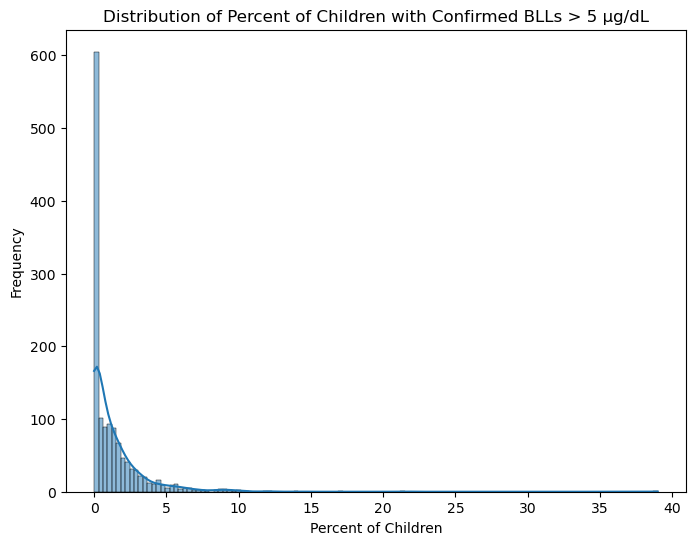

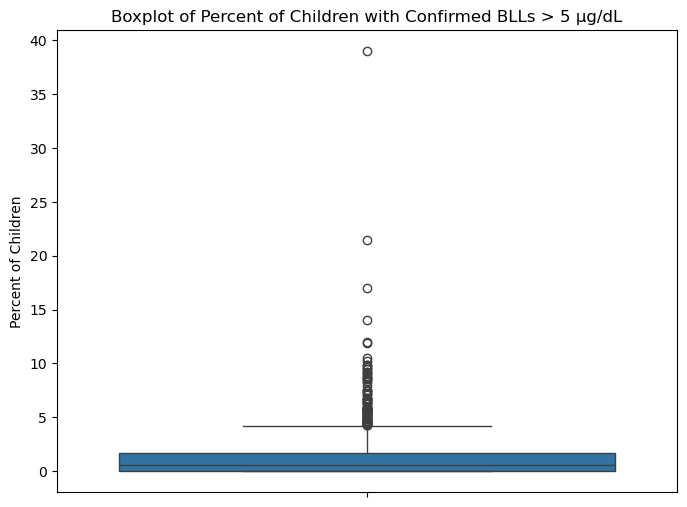

In [5]:
# Visualizations
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
bll_stats = merged_df[bll_column].describe()
print(f"Descriptive Statistics for '{bll_column}':\n{bll_stats}")

plt.figure(figsize=(8, 6))
sns.histplot(merged_df[bll_column].dropna(), kde=True)
plt.title('Distribution of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.xlabel('Percent of Children')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(y=merged_df[bll_column])
plt.title('Boxplot of Percent of Children with Confirmed BLLs > 5 µg/dL')
plt.ylabel('Percent of Children')
plt.show()

# EDA

In [6]:
# Get the indices of rows with non-NaN values in the target column
non_nan_indices = merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].dropna().index

# Get indices of outliers
outlier_indices = merged_df[merged_df['Percent of Children with Confirmed BLLs ³5 µg/dL'] > 10].index

# Remove the outlier rows, store that result in filtered_df
filtered_df = merged_df.drop(index=outlier_indices)
print(filtered_df.shape)

(2143, 66)


Built 1939 or earlier              0.457109
House Price$50,000 to $99,999      0.279129
Built 1940 to 1959                 0.223777
lat                                0.214976
House Price$100,000 to $149,999    0.213369
                                     ...   
House Price$300,000 to $499,999   -0.217715
ADHD Percentage (Current)         -0.221907
ADHD Percentage (Ever)            -0.222465
Built 2000 to 2019                -0.312432
Built 1980 to 1999                -0.344931
Name: Percent of Children with Confirmed BLLs ³5 µg/dL, Length: 63, dtype: float64


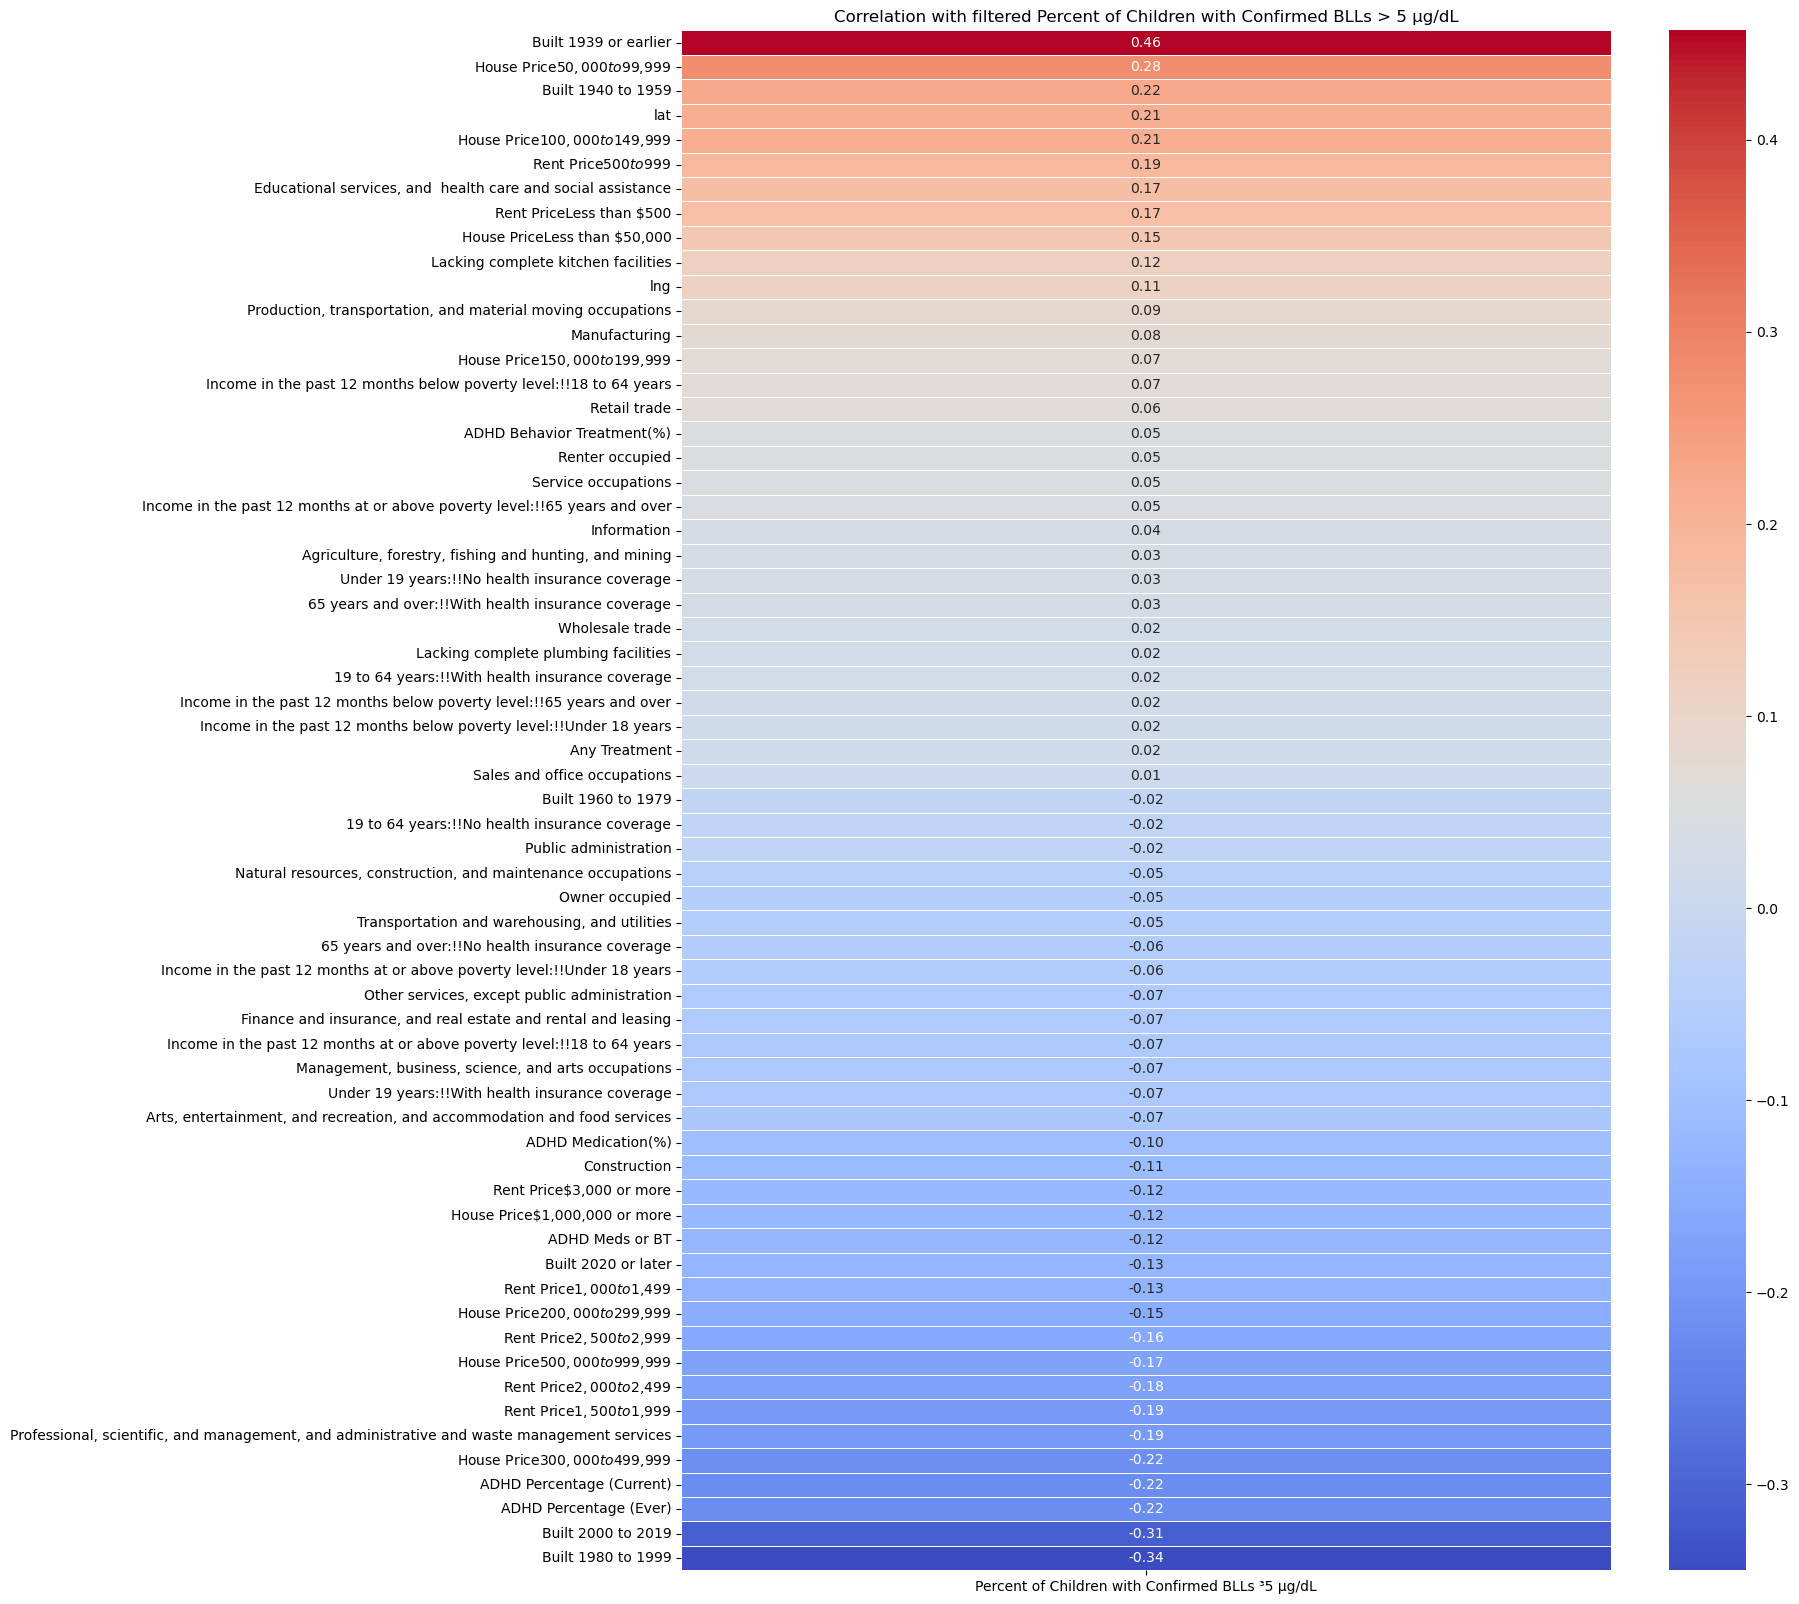

In [7]:
# Correlation analysis and visualization
# Remove relevant columns
columns_to_exclude = ['State', 'County']
correlation_filtered_df = filtered_df.drop(columns=columns_to_exclude, errors="ignore")

# Define modified data frame
correlation_with_bll = correlation_filtered_df.corr().drop('Percent of Children with Confirmed BLLs ³5 µg/dL')

# Sort the correlations in descending order
sorted_correlations = correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL'].sort_values(ascending=False)

# Print correlations
print(sorted_correlations)

# Visualize
plt.figure(figsize=(15, 20))
sns.heatmap(sorted_correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title(f"Correlation with filtered Percent of Children with Confirmed BLLs > 5 µg/dL")
plt.show()

In [8]:
# Determine number of missing values in filtered_df
missing_percentage = filtered_df[bll_column].isnull().sum() / len(filtered_df) * 100
print(f"Percentage of missing values in '{bll_column}': {missing_percentage:.2f}%")

Percentage of missing values in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 37.28%


# Data cleaning for features

In [9]:
# Identify columns with missing values, excluding specified columns
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(f"Number of feature columns with missing entries is :{len(cols_with_missing)}")
print(cols_with_missing)

Number of feature columns with missing entries is :57
['Built 2020 or later', 'Built 2000 to 2019', 'Built 1980 to 1999', 'Built 1960 to 1979', 'Built 1940 to 1959', 'Built 1939 or earlier', 'Lacking complete plumbing facilities', 'Lacking complete kitchen facilities', 'House PriceLess than $50,000', 'House Price$50,000 to $99,999', 'House Price$100,000 to $149,999', 'House Price$150,000 to $199,999', 'House Price$200,000 to $299,999', 'House Price$300,000 to $499,999', 'House Price$500,000 to $999,999', 'House Price$1,000,000 or more', 'Rent PriceLess than $500', 'Rent Price$500 to $999', 'Rent Price$1,000 to $1,499', 'Rent Price$1,500 to $1,999', 'Rent Price$2,000 to $2,499', 'Rent Price$2,500 to $2,999', 'Rent Price$3,000 or more', 'Owner occupied', 'Renter occupied', 'Under 19 years:!!With health insurance coverage', 'Under 19 years:!!No health insurance coverage', '19 to 64 years:!!With health insurance coverage', '19 to 64 years:!!No health insurance coverage', '65 years and over

In [10]:
# Impute missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=42) #one can adjusts max_iter
imputer.fit(filtered_df[cols_with_missing])
imputed_data = imputer.transform(filtered_df[cols_with_missing])
filtered_df[cols_with_missing] = imputed_data

In [11]:
# Check to see if there are columns with missing values left
cols_with_missing = [col for col in filtered_df.columns if filtered_df[col].isnull().any()
and col not in ['Percent of Children with Confirmed BLLs ³5 µg/dL']]

print(f"Now the number of columns with missing value is: {len(cols_with_missing)}")

Now the number of columns with missing value is: 0


# Feature engineering

In [12]:
# Set a correlation threshold to remove features
corr_threshold = 0.02

# Use the previously calculated correlation_with_bll
# Get features with low correlation
low_corr_features = correlation_with_bll[
    abs(correlation_with_bll['Percent of Children with Confirmed BLLs ³5 µg/dL']) <= corr_threshold
].index.tolist()

# Print low_corr_features and their correlations for debugging
print("Low Correlation Features:")
for feature in low_corr_features:
    corr_value = correlation_with_bll.loc[feature, 'Percent of Children with Confirmed BLLs ³5 µg/dL']
    print(f"  {feature}: {corr_value}")

# Remove house price and rent price features and some more
cols_to_remove = list(set(low_corr_features + [ 
    'House PriceLess than $50,000',
    'House Price$50,000 to $99,999',
    'House Price$100,000 to $149,999',
    'House Price$150,000 to $199,999',
    'House Price$200,000 to $299,999',
    'House Price$300,000 to $499,999',
    'House Price$500,000 to $999,999',
    'House Price$1,000,000 or more',
    'Rent PriceLess than $500',
    'Rent Price$500 to $999',
    'Rent Price$1,000 to $1,499',
    'Rent Price$1,500 to $1,999',
    'Rent Price$2,000 to $2,499',
    'Rent Price$2,500 to $2,999',
    'Rent Price$3,000 or more',
]))

# Print cols_to_remove to verify features being dropped
print("\nColumns to Remove:")
print(cols_to_remove)
print(f"The number of feature columns we removed is: {len(cols_to_remove)}")


Low Correlation Features:
  Sales and office occupations: 0.011329521369847773
  Income in the past 12 months below poverty level:!!Under 18 years: 0.01672732674854411
  Any Treatment: 0.0161735858700385

Columns to Remove:
['Any Treatment', 'House Price$200,000 to $299,999', 'Rent Price$500 to $999', 'Rent Price$1,000 to $1,499', 'Rent Price$2,500 to $2,999', 'Rent PriceLess than $500', 'Income in the past 12 months below poverty level:!!Under 18 years', 'House Price$50,000 to $99,999', 'House Price$300,000 to $499,999', 'Sales and office occupations', 'House PriceLess than $50,000', 'Rent Price$3,000 or more', 'House Price$1,000,000 or more', 'Rent Price$2,000 to $2,499', 'House Price$100,000 to $149,999', 'House Price$500,000 to $999,999', 'Rent Price$1,500 to $1,999', 'House Price$150,000 to $199,999']
The number of feature columns we removed is: 18


In [13]:
# Drop the columns from filtered_df
filtered_df = filtered_df.drop(columns=cols_to_remove, errors="ignore")
print(filtered_df.shape)

(2143, 48)


In [14]:
# Count non-null values in the target column
non_null_count = filtered_df['Percent of Children with Confirmed BLLs ³5 µg/dL'].notna().sum()

# Print the count
print(f"Number of rows with non-null percent bll values: {non_null_count}")

Number of rows with non-null percent bll values: 1344


# Data splitting


In [15]:
from sklearn.model_selection import train_test_split

# Remove 'State' and 'County'
new_df = filtered_df.drop(columns=['State', 'County'])
# Split data into training and prediction sets
df_train = new_df[filtered_df[bll_column].notnull()]
df_predict = new_df[filtered_df[bll_column].isnull()]

# Features (X) and target variable (y)
X_train = df_train.drop(columns=bll_column)
y_train = df_train[bll_column]
X_predict = df_predict.drop(columns=bll_column)

# Split training sets into 80/20
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("X_predict", X_predict.shape)

X_train shape: (1075, 45)
X_val shape: (269, 45)
y_train shape: (1075,)
y_val shape: (269,)
X_predict (799, 45)


In [16]:
print(X_train.shape)

(1075, 45)


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.pipeline import Pipeline


# Define columns to scale and exclude
adhd_cols = [col for col in X_train.columns if col.startswith('ADHD')]
geo_cols = ['lat', 'lng']  # Add geospatial columns
cols_to_scale = [col for col in X_train.columns if col not in adhd_cols and
                 col not in geo_cols]

# Function to scale ADHD columns
def scale_adhd(X):
    return X / 100

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cols_to_scale),  # Scale numerical features
        ('adhd', FunctionTransformer(scale_adhd), adhd_cols),  # Scale ADHD columns
        ('passthrough', 'passthrough', geo_cols)  # Keep geospatial features
    ],
    remainder='passthrough'
)

# Fit the preprocessor on X_train
preprocessor.fit(X_train)

# Transform X_train, X_val, and X_predict using the fitted preprocessor
X_train_scaled = preprocessor.transform(X_train)
X_val_scaled = preprocessor.transform(X_val)
X_predict_scaled = preprocessor.transform(X_predict)


# Model training with Random Forest

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define parameter grid
param_grid = {
    'n_estimators': np.arange(100,500,50),
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create Random Forest Regressor object
rf_regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=rf_regressor,
    param_distributions=param_grid,
    n_iter=50,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model to the scaled training data
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   3.4s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=250; total time=   3.3s
[CV] END max_depth=10, max_features=None, min_samples_leaf=4, min_samples_split=5, n_estimators=25

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_depth': [None, 5, 10, 15],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [19]:
# Get the best parameters
best_params_rf = random_search.best_params_
print("Best Parameters:", best_params_rf)

# Get the best model
best_model_rf = random_search.best_estimator_

# Make predictions
y_pred_rf = best_model_rf.predict(X_val_scaled)

# Evaluate MSE and R2
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)

# Calculate RMSE
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Best Parameters: {'n_estimators': np.int64(200), 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': None}
Random Forest - Root Mean Squared Error: 1.196547531168801
Random Forest - R-squared: 0.5127655379498394


In [20]:
# Get feature importance
feature_importance_rf = best_model_rf.feature_importances_

# Create df for feature importance
feature_importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_rf
})

# Sort by importance
feature_importance_rf_df = feature_importance_rf_df.sort_values(by='Importance', ascending=False)

# Select top 10 features
top_10_features_rf = feature_importance_rf_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_rf:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 5
Feature: ADHD Percentage (Ever), Index: 40
Feature: ADHD Behavior Treatment(%), Index: 42
Feature: 19 to 64 years:!!No health insurance coverage, Index: 13
Feature: ADHD Meds or BT, Index: 44
Feature: lat, Index: 38
Feature: ADHD Medication(%), Index: 43
Feature: lng, Index: 39
Feature: 19 to 64 years:!!With health insurance coverage, Index: 12
Feature: ADHD Percentage (Current), Index: 41


In [21]:
# Get the indices of the top features in the original X_train DataFrame
top_feature_indices = [X_train.columns.get_loc(feature) for feature in top_10_features_rf]

# Select the top features from the scaled data using the indices
X_train_selected_rf = X_train_scaled[:, top_feature_indices]
X_val_selected_rf = X_val_scaled[:, top_feature_indices]

# Implement Random Forest
model_rf = RandomForestRegressor(random_state=42, **best_params_rf)  

# Train the model on the selected features
model_rf.fit(X_train_selected_rf, y_train)

# Make predictions on the validation set
y_pred_rf = model_rf.predict(X_val_selected_rf)

# Evaluate the model
mse_rf = mean_squared_error(y_val, y_pred_rf)
r2_rf = r2_score(y_val, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f"Random Forest - Root Mean Squared Error: {rmse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

Random Forest - Root Mean Squared Error: 1.1450325108890727
Random Forest - R-squared: 0.5538162761439982


# Model training with XGboost

In [22]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define XGBoost regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 9],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1]
}

# Create RandomizedSearchCV object
random_search_xgb = RandomizedSearchCV(
    estimator=xgb_regressor,
    param_distributions=param_grid_xgb,
    n_iter=20,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search_xgb.fit(X_train_scaled, y_train)

# Get best params and best model
best_params_xgb = random_search_xgb.best_params_
best_xgb_model = random_search_xgb.best_estimator_
print("Best XGBoost Parameters:", best_params_xgb)

# Make predictions on validation set
y_pred_xgb = best_xgb_model.predict(X_val_scaled)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)

# Calculate RMSE
rmse_xgb = np.sqrt(mse_xgb)

print(f"XGBoost - Root Mean Squared Error: {rmse_xgb}")
print(f"XGBoost - R-squared: {r2_xgb}")

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=400, reg_alpha=1, reg_lambda=0, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=7,

In [23]:
# Get feature importance
feature_importance_xgb = best_xgb_model.feature_importances_

# Create df for feature importance
feature_importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance_xgb
})

# Sort by importance
feature_importance_xgb_df = feature_importance_xgb_df.sort_values(by='Importance', ascending=False)

# Select top 15 features
top_10_features_xgb = feature_importance_xgb_df['Feature'].head(10).tolist()

# Print feature names and indices for verification
for feature in top_10_features_xgb:
    feature_index = X_train.columns.get_loc(feature)
    print(f"Feature: {feature}, Index: {feature_index}")

Feature: Built 1939 or earlier, Index: 5
Feature: lat, Index: 38
Feature: ADHD Percentage (Ever), Index: 40
Feature: ADHD Behavior Treatment(%), Index: 42
Feature: Construction, Index: 17
Feature: 19 to 64 years:!!With health insurance coverage, Index: 12
Feature: Renter occupied, Index: 9
Feature: 19 to 64 years:!!No health insurance coverage, Index: 13
Feature: Agriculture, forestry, fishing and hunting, and mining, Index: 16
Feature: ADHD Percentage (Current), Index: 41


In [24]:
# Get the indices of the top features in the original X_train DataFrame
top_feature_indices = [X_train.columns.get_loc(feature) for feature in top_10_features_xgb]

# Select the top features from the scaled data using the indices
X_train_selected_xgb = X_train_scaled[:, top_feature_indices]
X_val_selected_xgb = X_val_scaled[:, top_feature_indices]

# Implement XGBoost again
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', random_state=42, **best_params_xgb)

# Train the model on the selected features
model_xgb.fit(X_train_selected_xgb, y_train)

# Make predictions on the validation set
y_pred_xgb = model_xgb.predict(X_val_selected_xgb)

# Evaluate the model
mse_xgb = mean_squared_error(y_val, y_pred_xgb)
r2_xgb = r2_score(y_val, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print(f"Model - Root Mean Squared Error: {rmse_xgb}")
print(f"Model - R-squared: {r2_xgb}")

Model - Root Mean Squared Error: 1.1679517380756392
Model - R-squared: 0.5357756862886525


# Visualizations of predicted vs actual values and bar chart for feature importance

In [30]:
bll_column = 'Percent of Children with Confirmed BLLs ³5 µg/dL'
num_zeros = (filtered_df[bll_column] == 0).sum()

print(f"Number of values equal to 0 in '{bll_column}': {num_zeros}")

Number of values equal to 0 in 'Percent of Children with Confirmed BLLs ³5 µg/dL': 496


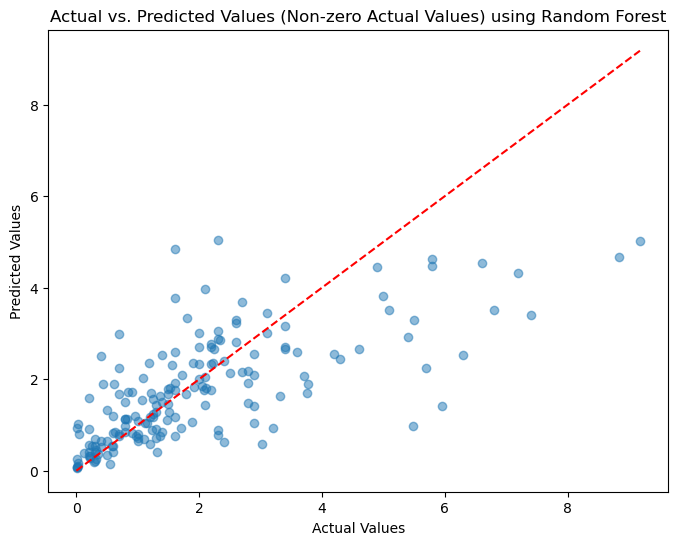

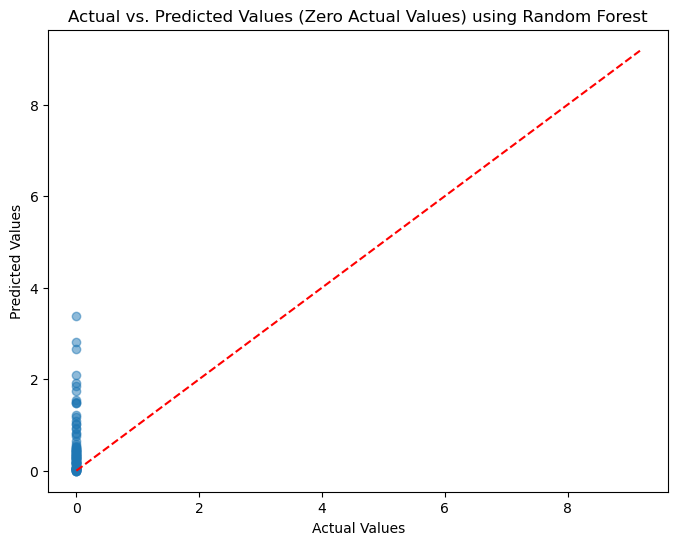

In [25]:
# Scatter plot of predicted versus actual values (Non-zero actual values)
non_zero_indices = y_val != 0  # Get indices where actual values are not zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[non_zero_indices], y_pred_rf[non_zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Non-zero Actual Values) using Random Forest")
plt.show()

# Scatter plot of predicted versus actual values (Zero actual values)
zero_indices = y_val == 0  # Get indices where actual values are zero

plt.figure(figsize=(8, 6))
plt.scatter(y_val[zero_indices], y_pred_rf[zero_indices], alpha=0.5)
plt.plot([min(y_val), max(y_val)], [min(y_val), max(y_val)], color='red', linestyle='--') 
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Zero Actual Values) using Random Forest")
plt.show()

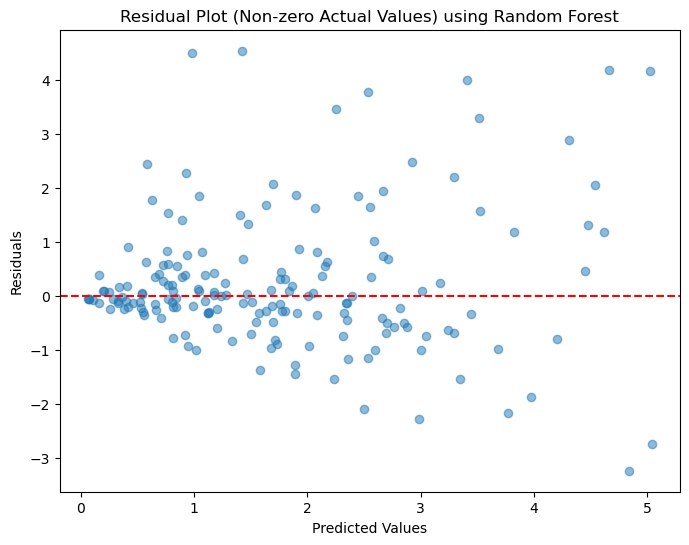

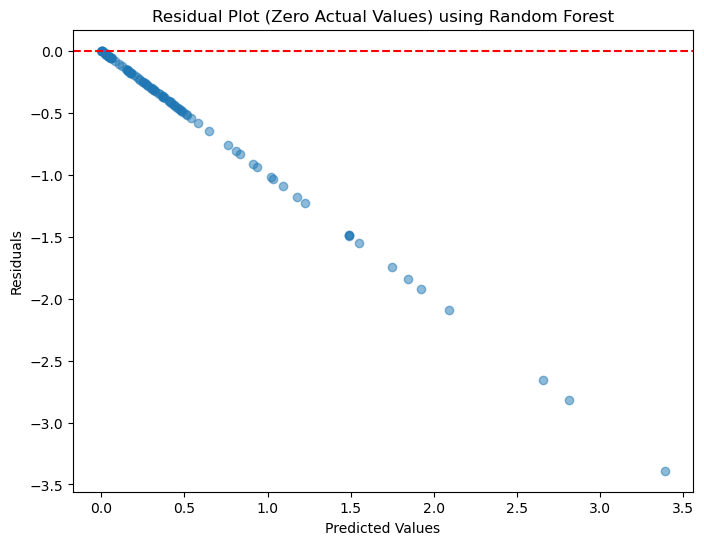

In [26]:
# Residual plot (Non-zero actual values)
residuals_non_zero = y_val[non_zero_indices] - y_pred_rf[non_zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf[non_zero_indices], residuals_non_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Non-zero Actual Values) using Random Forest")
plt.show()

# Residual plot (Zero actual values)
residuals_zero = y_val[zero_indices] - y_pred_rf[zero_indices]

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf[zero_indices], residuals_zero, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero residual line
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Zero Actual Values) using Random Forest")
plt.show()

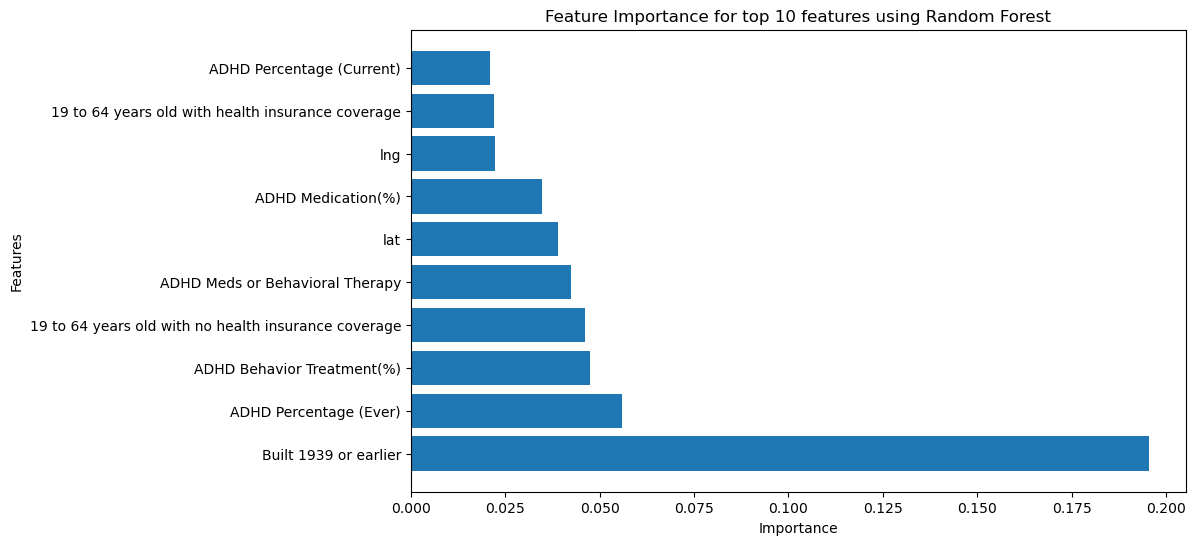

In [31]:
# Bar chart of top 10 features
feature_labels = [
    "Built 1939 or earlier",
    "ADHD Percentage (Ever)",
    "ADHD Behavior Treatment(%)",
    "19 to 64 years old with no health insurance coverage",
    "ADHD Meds or Behavioral Therapy",  
    "lat",  
    "ADHD Medication(%)",
    "lng",  
    "19 to 64 years old with health insurance coverage", 
    "ADHD Percentage (Current)"
]  # Replace with desired labels in the correct order - this is due to some strings being poorly presented in csv file
plt.figure(figsize=(10, 6))
plt.barh(feature_labels,
         feature_importance_rf_df['Importance'].head(10))
plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Feature Importance for top 10 features using Random Forest")
plt.show()

In [28]:
# Now use the model to do evaluation on the missing value rows

# Get the indices of the top features in the original X_train df
top_feature_indices = [X_train.columns.get_loc(feature) for feature in top_10_features_rf]

# Select the top features from the scaled data using the indices
X_predict_selected = X_predict_scaled[:, top_feature_indices]

# Make predictions:
predicted_bll_values = model_rf.predict(X_predict_selected) 

# Fill in missing values in df_predict:
df_predict.loc[:, 'Percent of Children with Confirmed BLLs ³5 µg/dL'] = predicted_bll_values

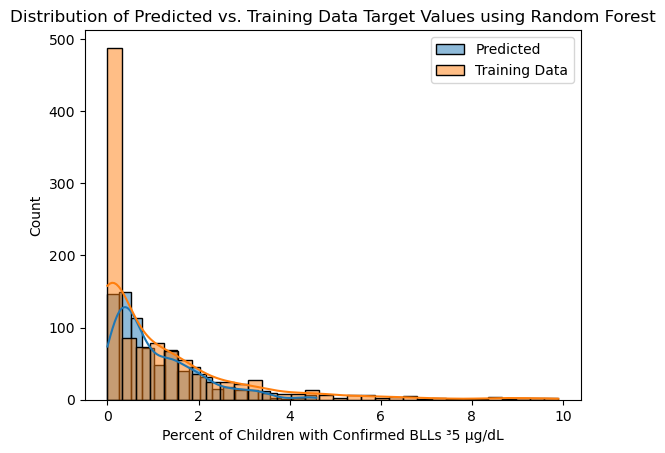

In [29]:
# Make a histogram to visualize the distribution of our non-null values 
# versus our predictions for the null rows
original_y = pd.concat([y_train, y_val])  

sns.histplot(predicted_bll_values, kde=True, label="Predicted")
sns.histplot(y_train, kde=True, label="Training Data")
plt.title("Distribution of Predicted vs. Training Data Target Values using Random Forest")
plt.legend()
plt.show()